In [1]:
import cv2
import numpy as np

--------
# 이미지 속성
    1. img.shape : 이미지 해상도 및 채널 수 (height, width, channel)
    2. img.size : 이미지 크기 (byte 단위)
    3. img.dtype : 이미지 데이터 타입

In [9]:
img = cv2.imread('bald-eagle-5463386_1280.jpg')
print(img.shape)
print(img.size)
print(img.dtype)

(867, 1280, 3)
3329280
uint8


In [11]:
cv2.imshow('Show Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
# 이미지 픽셀 값 얻고 수정해보기
    한 장의 이미지는 지정된 크기의 BGR 값들의 배열로 이루어져 있다. 예를들어 10 * 10 크기의 이미지는 가로 10, 세로 10 픽셀들의 행렬이고, 각 픽셀들은 (B, G, R)의 벡터로 이루어져 있다. 여기서 B, G, R은 0~255 사이의 정수가 된다. cv2.imread 함수 이 이미지들을 불러오면 numpy array 형식으로 저장이 된다. 이때 컬러이미지는 3차원 numpy array 형식으로 이루어져 있으며 [행, 열, 채널]의 값으로 구성되어 있다. 이때 채널의 값은 첫번째 차원에서는 B, 두번째 차원에서는 G, 세번째 차원에서는 R 값이 저장되어 있다.

In [14]:
px = img[500, 900]
print('BGR', px)
print('b : ', px[0])
print('g : ', px[1])
print('r : ', px[2])

BGR [194 193 203]
b :  194
g :  193
r :  203


    위 코드는 이미지를 열어 [340, 200] 위치에 존재하는 픽셀 값을 출력하는 코드이다. px값의 첫번째 요소는 B, 두번째 요소는 G, 세번째 요소는 R 값을 가리키며, 즉 위와 같은 방법으로 픽셀 값을 불러오면 해당 픽셀의 색상 코드 값을 알 수 있다. 해당 위치의 색상 코드를 바꾸고 싶으면 다음과 같은 방법을 사용할 수 있다.
   
    >>> img[340, 200] = [0, 0, 0]
    위 코드를 사용하면 해당 위치의 픽셀 값을 검정색으로 바꿀 수 있다. 하지만 이 코드는 개개의 픽셀 작업을 수행하는데 있어 성능상 문제가 있을 수 있다. Numpy는 이러한 계산에 최적화된 알고리즘을 적용하였으므로 개별적인 픽셀에 접근하여 그 값을 변경하기 위해선 아래의 방법을 사용하는 것이 더 낫다.

In [15]:
B = img.item(500, 900, 0)
G = img.item(500, 900, 1)
R = img.item(500, 900, 2)
BGR = [B, G, R]
print(BGR)

[194, 193, 203]


In [16]:
img.itemset((500, 900, 2), 100)
px

array([194, 193, 100], dtype=uint8)

    이미지의 item 속성을 이용해 해당 픽셀 값에 개별적으로 접근할 수 있다. 이때 B, G, R 개별적으로 접근해야 한다. 또한 이미지의 itemset 속성을 이용해 해당 픽셀 값에 B, G, R 개별적으로 접근하여 픽셀값을 변경해줄 수 있다. 위 코드는 [340, 200] 위치의 R 색상 코드를 100으로 바꿔주는 코드이다.

--------
# 이미지 채널별로 분리

In [53]:
img2_copy = img2.copy()
b, g, r = cv2.split(img2_copy)
# b = img[:. :. 0]
# g = img[:. :. 1]
# r = img[:. :. 2]

cv2.imshow('blue channel', b)
cv2.imshow('green channel', g)
cv2.imshow('red channel', r)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
print(img2_copy[500, 900])
print(b[500, 900], g[500, 900], r[500, 900])

[194 193 203]
194 193 203


    대부분의 컬러 이미지는 B, G, R 3개의 채널로 이루어져 있다. 이를 split 함수를 이용해 각각의 채널로 손쉽게 분리할 수 있다. 물론 이렇게 분리한 채널은 B, G, R 각각 1개의 채널값으로 이루어져 있기 때문에 모두 흑백 이미지로 보여진다. 하지만 split함수는 성능 면에서 효율적인 함수는 아니므로 Numpy slicing을 활용하여 채널을 분리하는 것이 더 효과적일 수도 있다.

In [54]:
# Blue 채널만 0으로 바꿈
blue_zero = np.full((867, 1280, 1), 0, np.uint8)
merged_img = cv2.merge((blue_zero, g, r))
cv2.imshow('merged', merged_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

    split 함수로 채널을 분리하는 것 말고도 merge 함수를 통해 특정 채널만을 함칠 수도 있다. 혹은 다음과 같은 방법으로 특정 채널만을 볼 수 있는 방법도 있다.

In [55]:
# Green 채널만 0으로 바꿈
img[:, :, 1] = 0
cv2.imshow('Show Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

--------
# 이미지 ROI (Region of Image)
    Numpy array 슬라이싱을 통해 이미지 특정의 부분을 가져올 수 있다.

In [47]:
img2 = cv2.imread('bald-eagle-5463386_1280.jpg')
x, y = 223, 666
h, w = 465, 271

subimg = img2[x:x+h, y:y+w]
cv2.imshow('cutting', subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
cv2.rectangle(subimg, (0, 0), (w-1, h-1), (0, 255, 255), 5)
cv2.imshow('bounding_box', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

    위 코드는 원본 이미지에서 (223, 666), (223 + 465, 666 + 271)으로 만들어진 직사각형을 관심영역, ROI로 잡은 것이다. 실행해보면 해당부분의 이미지만을 따로 불러올 수 있다. 물론 관심영역에 직사각형 모양으로 bounding box를 집어넣을 수도 있다.

In [37]:
img2[x:x+h, y-w:y] = subimg
cv2.imshow('modified', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

    이렇게 가져온 ROI 부분을 원본 이미지에 붙여넣기 할 수도 있다.

## 마우스 이벤트로 ROI 지정 (Bounding box)

In [4]:
img3 = cv2.imread('image/14497276538643.jpg')
drag = False
default_x, default_y, w, h = -1, -1, -1, -1
blue, yellow = (255, 0, 0), (0, 255, 255)

def onMouse(event, x, y, flags, param):
    global drag, default_x, default_y
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drag = True
        default_x = x
        default_y = y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drag:
            img_draw = img3.copy()
            cv2.rectangle(img_draw, (default_x, default_y), (x, y), blue, 2)
            cv2.imshow('Show Image', img_draw)
    
    elif event == cv2.EVENT_LBUTTONUP:
        if drag:
            drag = False
            w = x - default_x
            h = y - default_y
            
            if w > 0 and h > 0:
                img_draw = img3.copy()
                cv2.rectangle(img_draw, (default_x, default_y), (x, y), yellow, 2)
                cv2.imshow('Show Image', img_draw)
                
                roi = img3[ default_y:default_y+h, default_x:default_x+w ]
                cv2.imshow('cropped', roi)
                cv2.moveWindow('cropped', 500, 500)
                cv2.imwrite('image/cropped_bubble.jpg', roi)
            
            else:
                cv2.imshow('dragging', img3)
                print('drag should start from left-top side')

cv2.imshow('Show Image', img3)
cv2.setMouseCallback("Show Image", onMouse, param = img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 129.5, 127.5, -0.5)

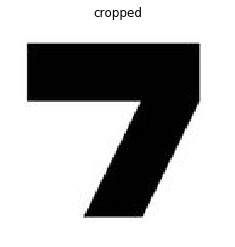

In [43]:
import matplotlib.pyplot as plt
cropped = cv2.imread('cropped.jpg')

b, g, r = cv2.split(cropped)
cropped = cv2.merge([r, g, b])

plt.title('cropped')
plt.imshow(cropped)
plt.axis('off')

    hangul.jpg 이미지를 불러와 img3 변수와 그에 필요한 전역변수들을 모두 초기화 해준다. 이후 setMouseCallback 함수로 마우스 이벤트를 발생시키기 전에 해당 이미지를 불러온다.

    'Show Image' 윈도우 창 위로 img3가 나타나면 관심영역으로 지정할 부분을 드래그하여 저장해준다. 왼쪽 버튼을 누르는 이벤트(cv2.EVENT_LBUTTONDOWN)를 발생시켜 이 지점부터 관심영역을 지정하겠다는 신호를 준다. 그러면서 drag = True, default_x = x, default_y = y (여기서 x, y는 LBUTTONDOWN 이벤트가 발생한 위치)로 초기화 시켜준다. 이후 마우스를 누른 상태로 마우스를 움직인 위치까지 관심영역으로 지정해야 하기 때문에 LBUTTONUP 이벤트가 발생하면 drag = False로 초기화 해준다.

    마우스를 누른 상태로 움직이면서 관심영역으로 지정될 부분을 알아야 한다. 그래서 MOUSEMOVE 이벤트가 발생하면 좌상단 위치에서 현재 위치 (x, y)까지 얼마나 이동했는지를 알아야 하기 때문에 해당 부분을 cv2.rectangle 함수로 이미지 위에 그려준다. ★ 이 때, 우리가 불러온 이미지를 복사하지 않고 그 이미지 위에 그대로 직사각형을 그려주면 마우스가 움직일 때마다 직사각형이 계속해서 그려지게 된다. 그래서 cv2.EVENT_MOUSEMOVE 이벤트가 발생할 때마다 이미지를 복사하고, 복사한 이미지 위에 직사각형을 그려 기본이미지를 깨끗한 상태로 유지해주는 것이 좋다. 또한 이 이벤트가 실시간으로 어떻게 그려지는지를 확인하려면 cv2.imshow('Show Image', img_draw) (이때, 윈도우 창의 이름을 동일하게 해주어야 한다.) 코드를 작성해주면 된다.

    관심영역 지정이 끝났으면 우하단에서 LBUTTONUP 이벤트를 발생시킨다. 이 때, 너비와 높이, w와 h의 크기를 지정해주어야 하기 때문에 w = default_x - x, h = default_y - y로 관심영역의 높이와 너비를 초기화한다. 이 때, 이 관심영역이 좌상단에서 우하단으로 지정되었는지를 확인하기 위해 w>0, h>0의 조건을 추가한 후 이를 만족시키면 해당 영역을 파란색이 아닌 노란색으로 바꿔주고 그 영역을 Slicing 하여 ROI를 지정해준다. 이렇게 지정된 부분을 cropped.jpg라는 이름으로 저장한다.